In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BlackFriday.csv')
print(df.shape)
df.head()

(537577, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [75]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [76]:
df = df.drop(['Product_Category_2', 'Product_Category_3'], axis=1) # or del df['Product_Category_2'] and del df['Product_Category_3']

In [77]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [78]:
df['User_ID'].nunique()

5891

In [79]:
df["User_ID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [80]:
df["Product_ID"].nunique()

3623

In [81]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [82]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [83]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [84]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [85]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [86]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [87]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [88]:
df["Purchase"].sum()/len(df["Purchase"])

9333.859852635065

In [89]:
for column in df.columns:
    print(column, df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


In [90]:
df["Gender"].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

<AxesSubplot: ylabel='Ratio'>

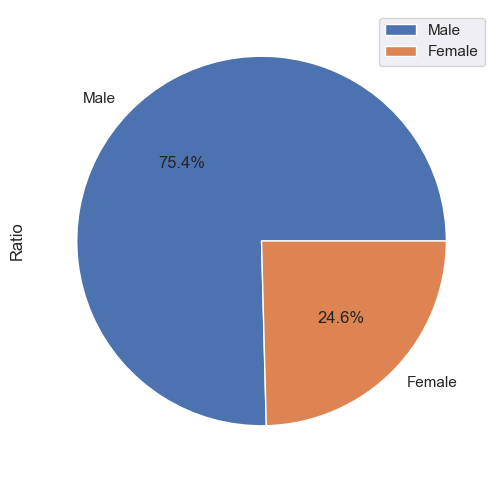

In [91]:
data = pd.DataFrame({"Ratio":[len(df[df["Gender"]=='M']),len(df[df["Gender"]=='F'])]},index=["Male","Female"])
data.plot.pie(y="Ratio",figsize=(6,6),autopct='%1.1f%%')

<AxesSubplot: title={'center': 'Gender Ratio'}>

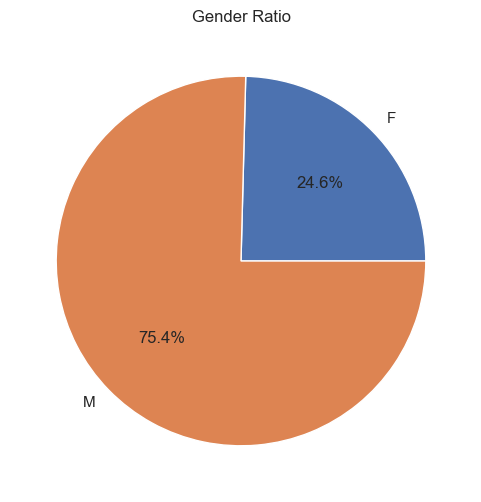

In [92]:
df.groupby("Gender").size().plot(kind="pie",autopct='%1.1f%%',figsize=(6,6),title="Gender Ratio")

<AxesSubplot: xlabel='Gender'>

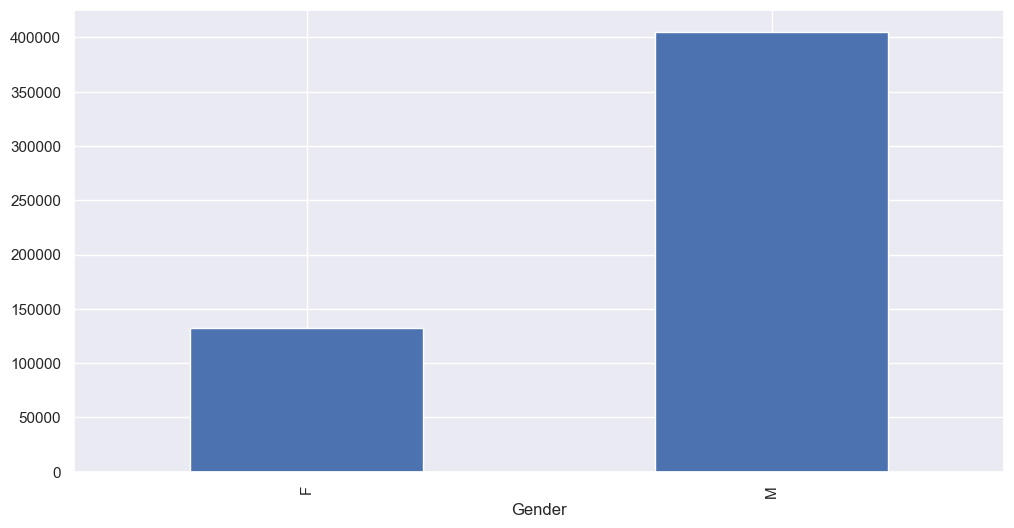

In [93]:
df.groupby("Gender").size().plot(kind="bar")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\621262707.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").sum()["Purchase"].plot(kind="pie",autopct="%.1f")


<AxesSubplot: ylabel='Purchase'>

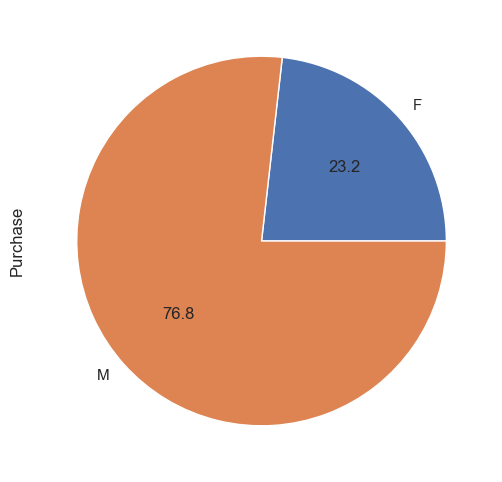

In [94]:
df.groupby("Gender").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\790087166.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").mean()["Purchase"].plot(kind="pie",autopct="%.1f")


<AxesSubplot: ylabel='Purchase'>

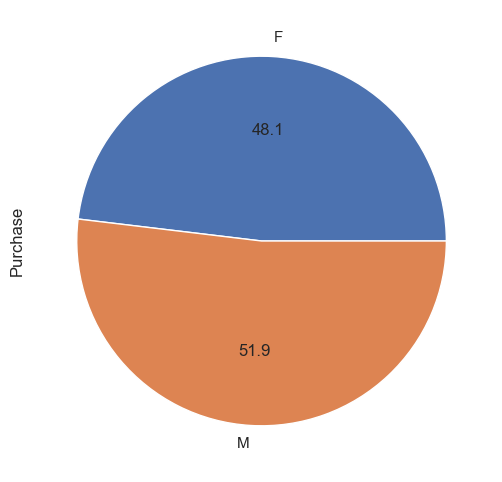

In [95]:
df.groupby("Gender").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

<AxesSubplot: title={'center': 'Purchase distribution by age'}, xlabel='Age'>

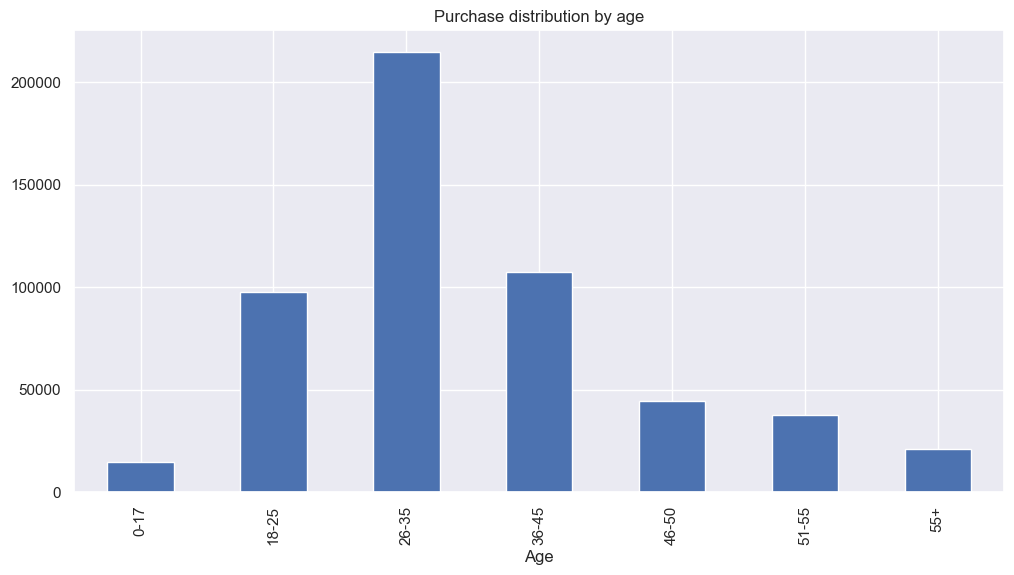

In [96]:
df.groupby("Age").size().plot(kind="bar",figsize=(12,6),title="Purchase distribution by age")

In [97]:
lst=[]
for i in df["Age"].unique():
    lst.append([i,df[df["Age"]==i]["Product_ID"].nunique()])
data=pd.DataFrame(lst,columns=["Age","Products"])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<AxesSubplot: title={'center': 'Number of unique products bought by age'}, xlabel='Age'>

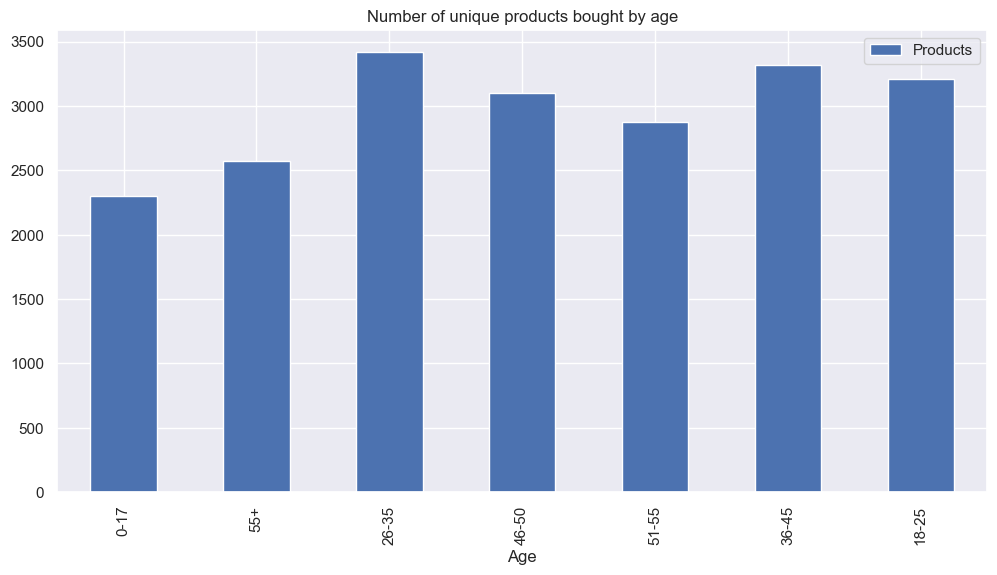

In [98]:
data.plot.bar(x="Age",y="Products",figsize=(12,6),title="Number of unique products bought by age")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\2561386160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Age").sum()["Purchase"].plot(kind="bar",figsize=(12,6),title="amount spent by age")


<AxesSubplot: title={'center': 'amount spent by age'}, xlabel='Age'>

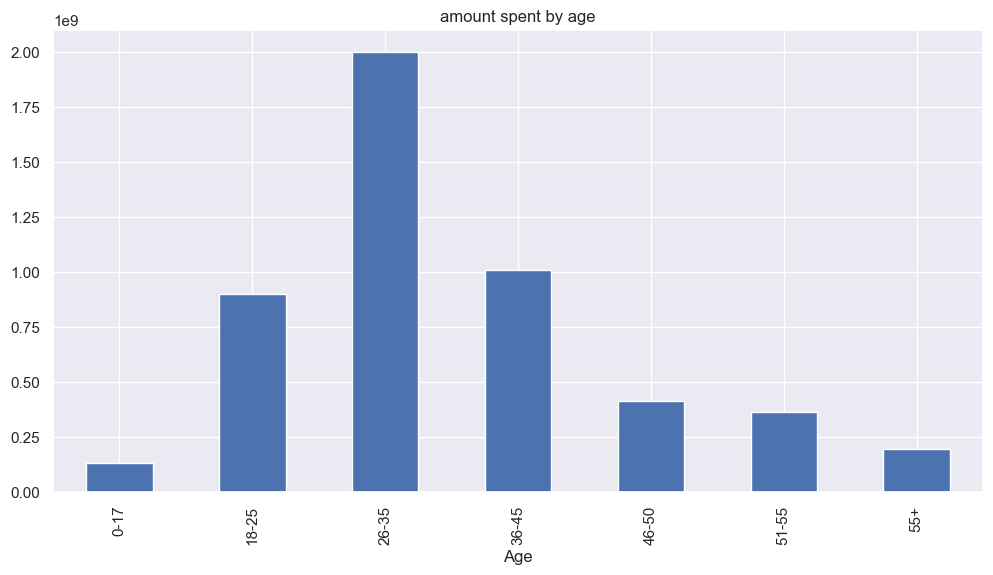

In [99]:
df.groupby("Age").sum()["Purchase"].plot(kind="bar",figsize=(12,6),title="amount spent by age")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\2133126574.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Age").mean()["Purchase"].plot(kind="bar",figsize=(12,6),title="amount spent by age")


<AxesSubplot: title={'center': 'amount spent by age'}, xlabel='Age'>

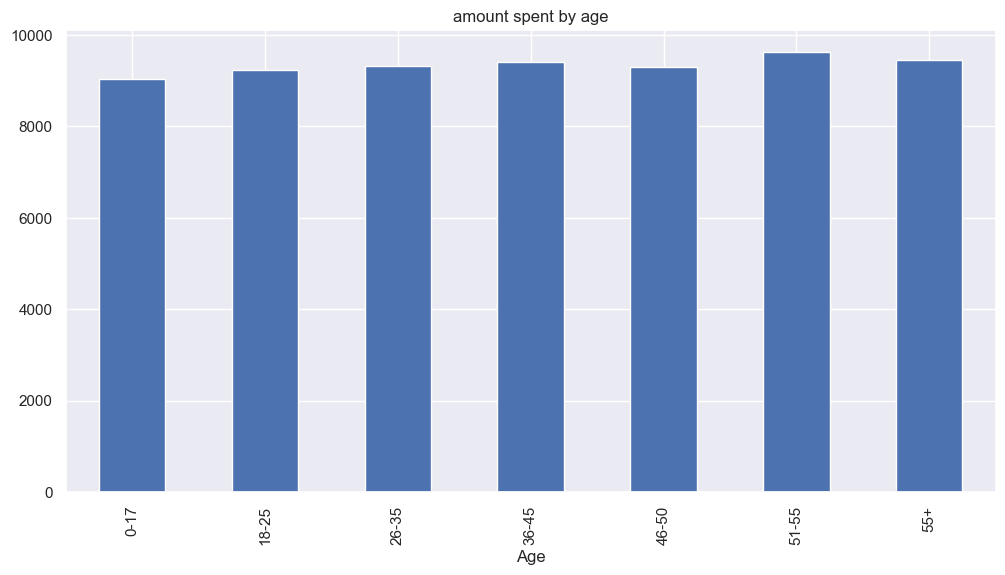

In [100]:
df.groupby("Age").mean()["Purchase"].plot(kind="bar",figsize=(12,6),title="amount spent by age")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\1181346863.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Age").mean()["Purchase"].plot(kind="pie",autopct="%.1f")


<AxesSubplot: ylabel='Purchase'>

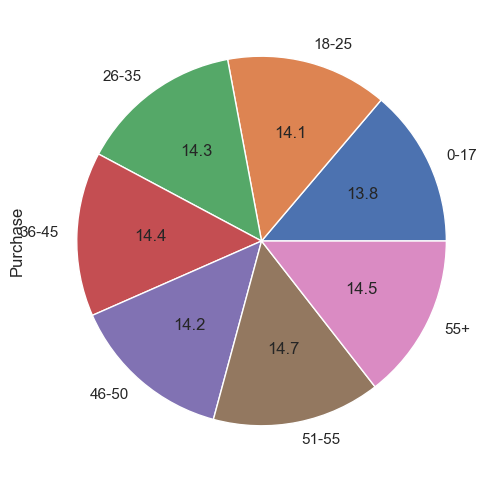

In [101]:
df.groupby("Age").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

<AxesSubplot: >

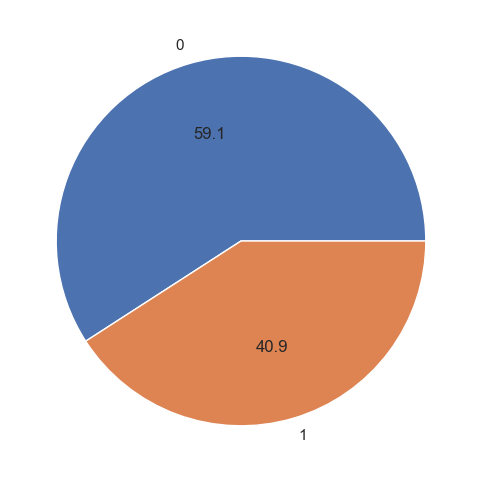

In [102]:
df.groupby("Marital_Status").size().plot(kind="pie",autopct="%.1f")

<AxesSubplot: >

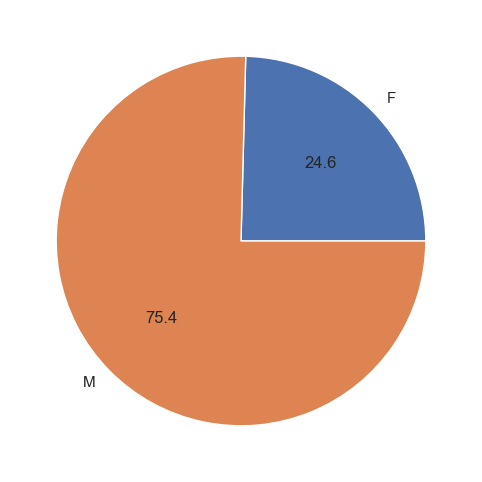

In [103]:
df.groupby("Gender").size().plot(kind="pie",autopct="%.1f")

<AxesSubplot: title={'center': 'Male spenders based on Marital Status'}>

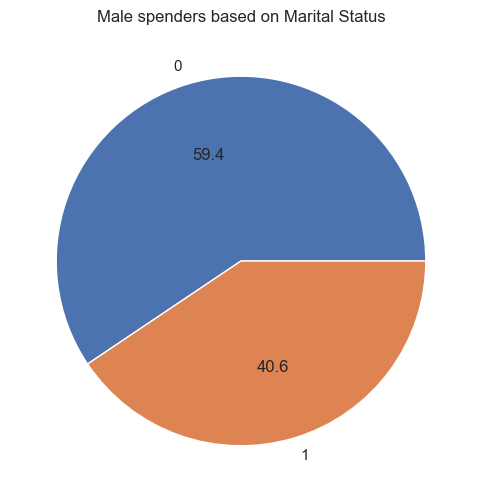

In [104]:
df[df["Gender"]=="M"].groupby("Marital_Status").size().plot(kind="pie",autopct="%.1f",title="Male spenders based on Marital Status")

<AxesSubplot: title={'center': 'Female spenders based on Marital Status'}>

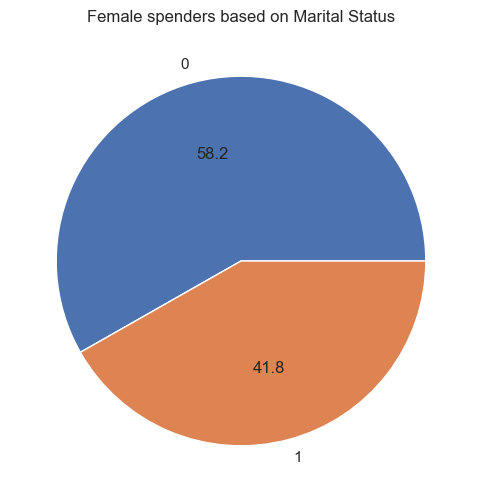

In [105]:
df[df["Gender"]=="F"].groupby("Marital_Status").size().plot(kind="pie",autopct="%.1f",title="Female spenders based on Marital Status")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\4018732974.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df["Gender"]=="M"].groupby("Age").mean()["Purchase"].plot(kind="bar",figsize=(12,6),title="amount spent by males by age")


<AxesSubplot: title={'center': 'amount spent by males by age'}, xlabel='Age'>

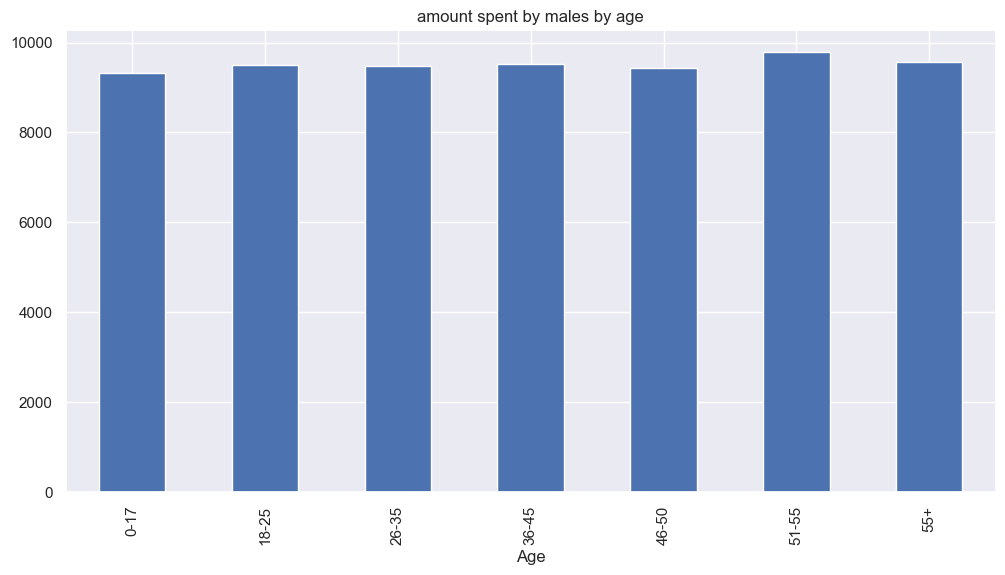

In [106]:
df[df["Gender"]=="M"].groupby("Age").mean()["Purchase"].plot(kind="bar",figsize=(12,6),title="amount spent by males by age")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\4009556147.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df["Gender"]=="F"].groupby("Age").mean()["Purchase"].plot(kind="bar",figsize=(12,6),title="amount spent by females by age")


<AxesSubplot: title={'center': 'amount spent by females by age'}, xlabel='Age'>

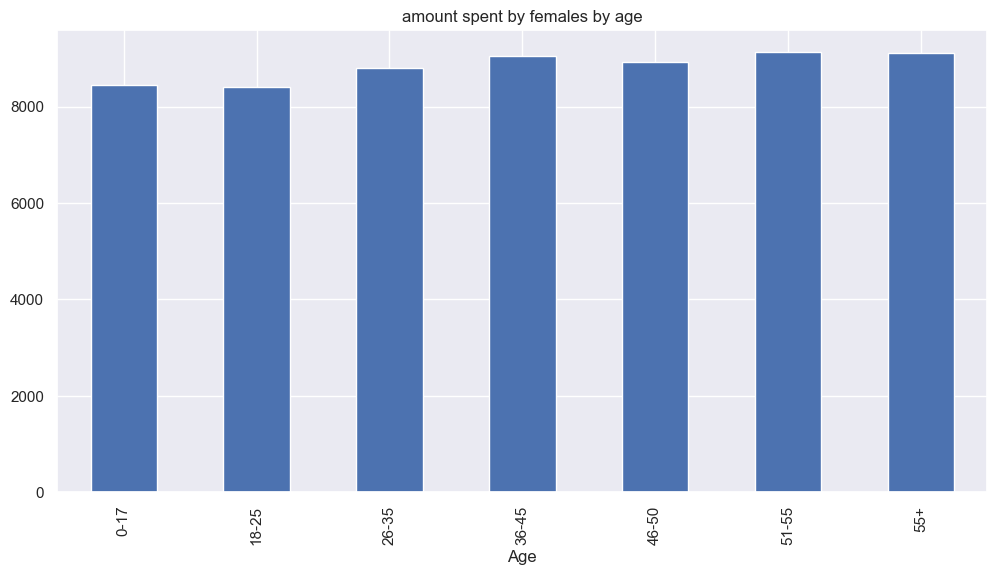

In [107]:
df[df["Gender"]=="F"].groupby("Age").mean()["Purchase"].plot(kind="bar",figsize=(12,6),title="amount spent by females by age")

In [108]:
import seaborn as sns

<AxesSubplot: xlabel='Age', ylabel='count'>

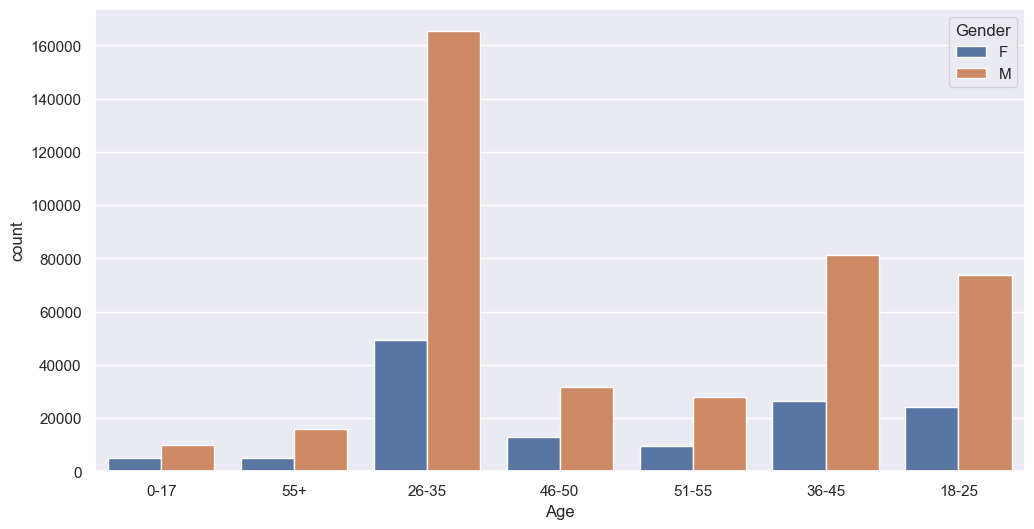

In [109]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Age",hue="Gender",data=df)

<AxesSubplot: xlabel='Gender', ylabel='count'>

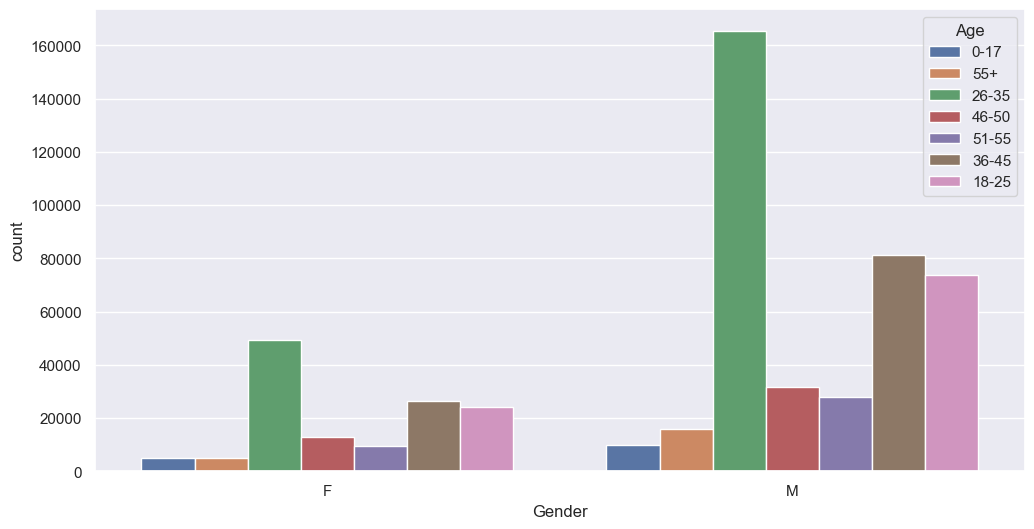

In [110]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Gender",hue="Age",data=df)

<AxesSubplot: xlabel='Gender', ylabel='count'>

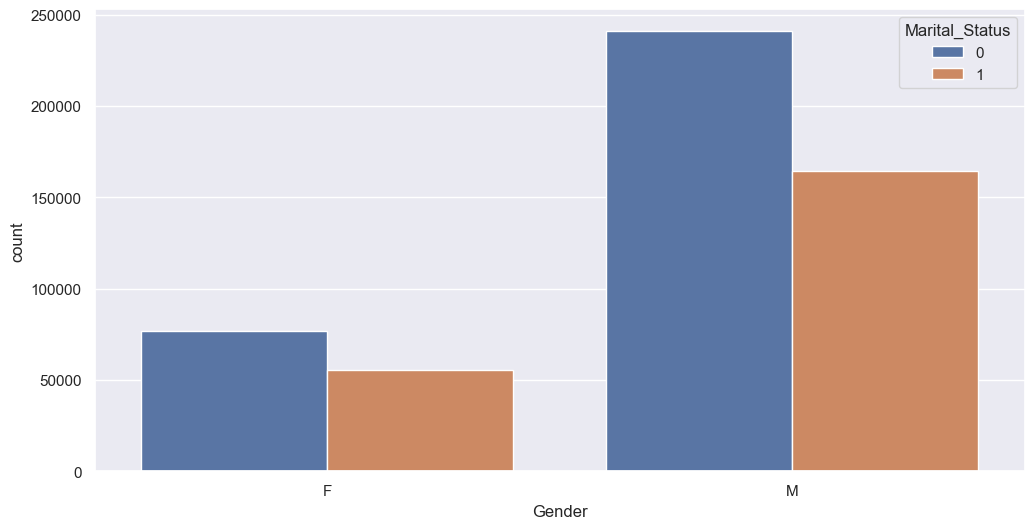

In [111]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Gender",hue="Marital_Status",data=df)

<AxesSubplot: xlabel='Marital_Status', ylabel='count'>

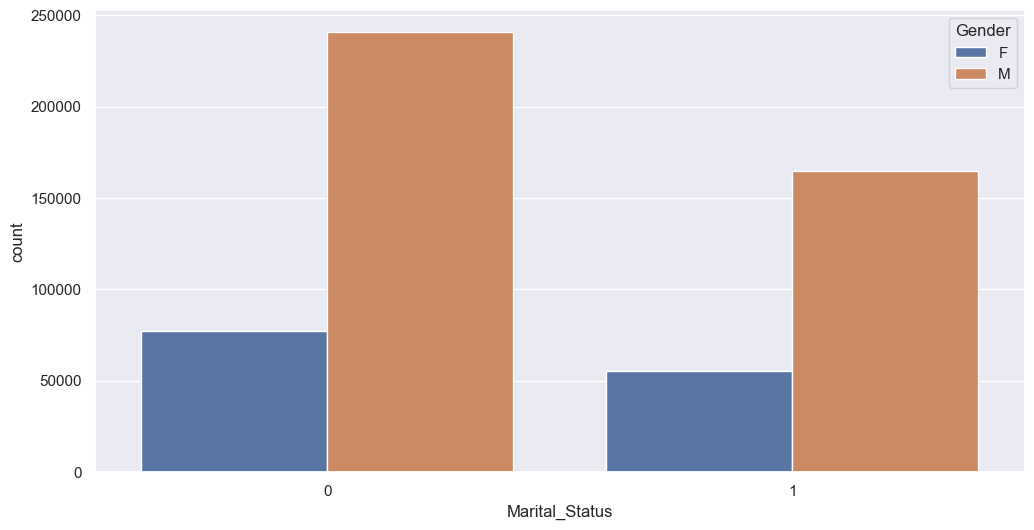

In [112]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Marital_Status",hue="Gender",data=df)

<AxesSubplot: xlabel='City_Category', ylabel='count'>

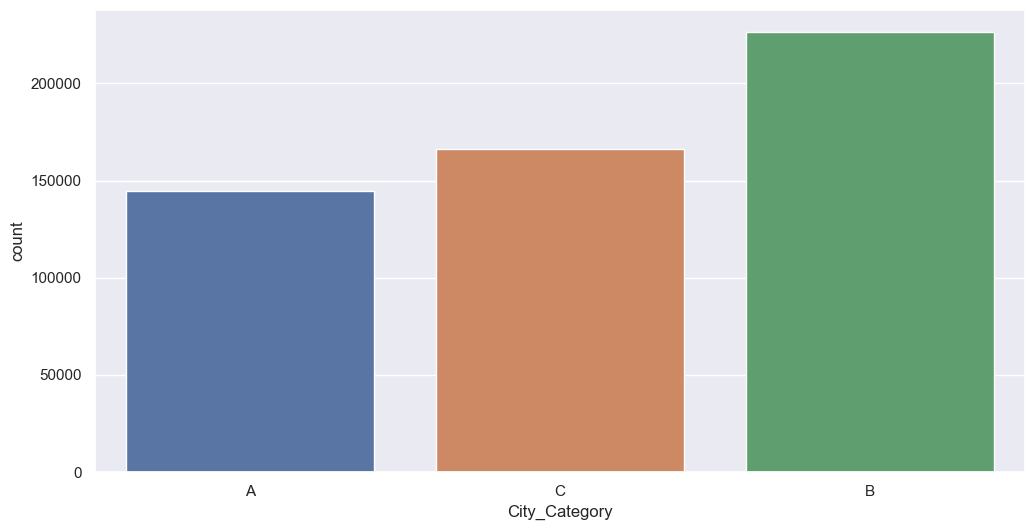

In [113]:
sns.countplot(x=df["City_Category"])

<AxesSubplot: >

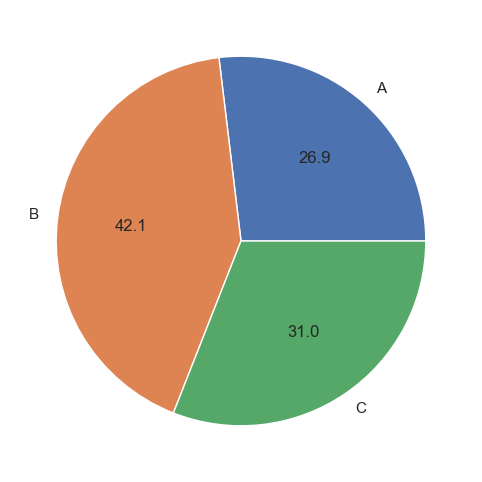

In [114]:
df.groupby("City_Category").size().plot(kind="pie",autopct="%.1f")

<AxesSubplot: xlabel='City_Category', ylabel='count'>

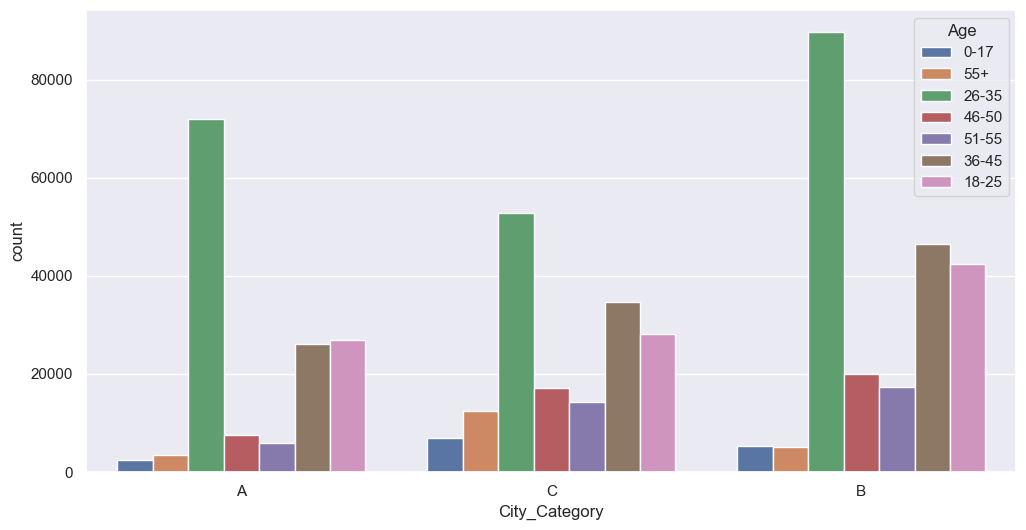

In [115]:
sns.countplot(x="City_Category",hue="Age",data=df)

<AxesSubplot: xlabel='City_Category', ylabel='count'>

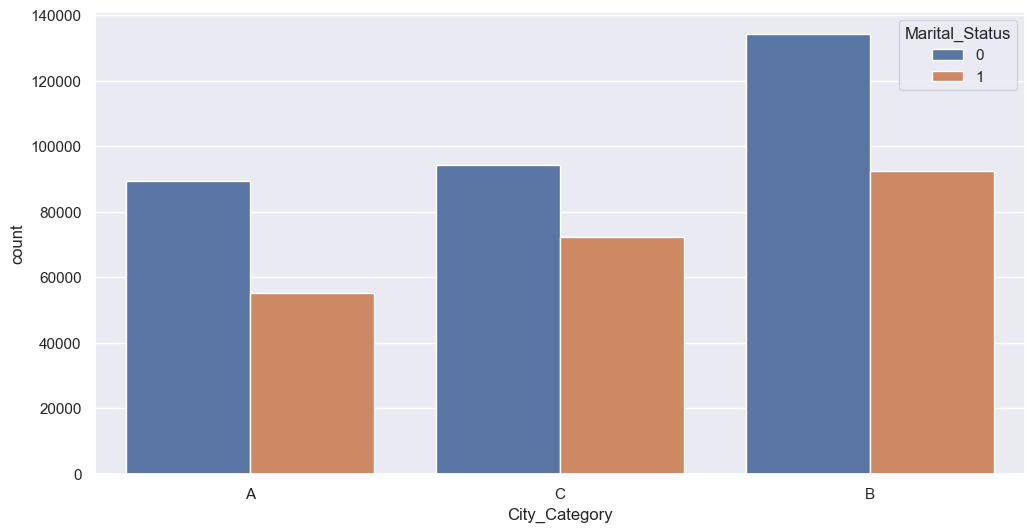

In [116]:
sns.countplot(x="City_Category",hue="Marital_Status",data=df)

<AxesSubplot: xlabel='City_Category', ylabel='count'>

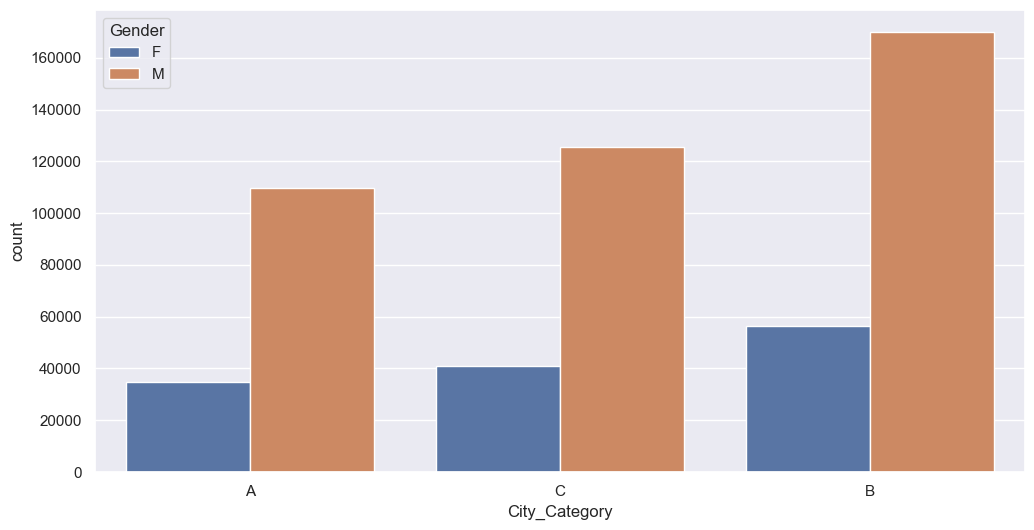

In [117]:
sns.countplot(x="City_Category",hue="Gender",data=df)

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\798257733.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("City_Category").sum()["Purchase"].plot(kind="pie",autopct="%.1f")


<AxesSubplot: ylabel='Purchase'>

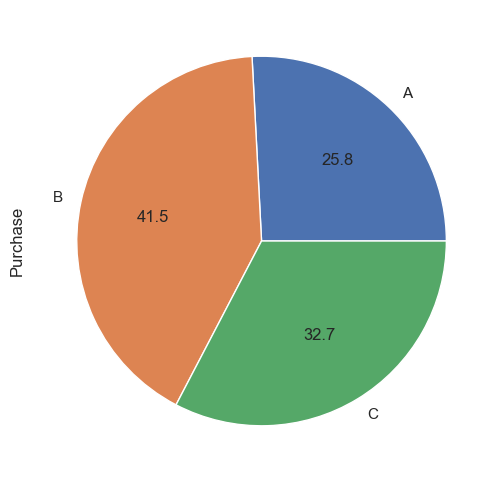

In [118]:
df.groupby("City_Category").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\517179554.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("City_Category").mean()["Purchase"].plot(kind="pie",autopct="%.1f")


<AxesSubplot: ylabel='Purchase'>

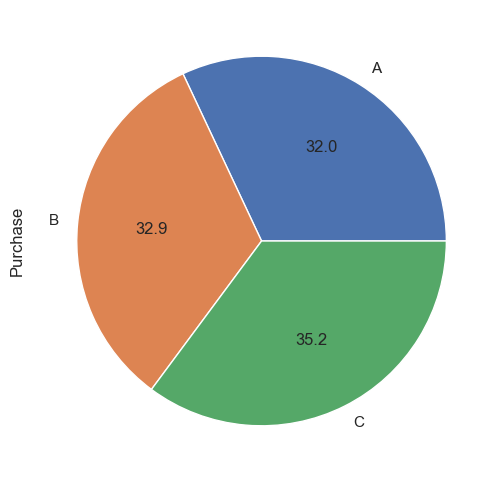

In [119]:
df.groupby("City_Category").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

<AxesSubplot: xlabel='Stay_In_Current_City_Years', ylabel='count'>

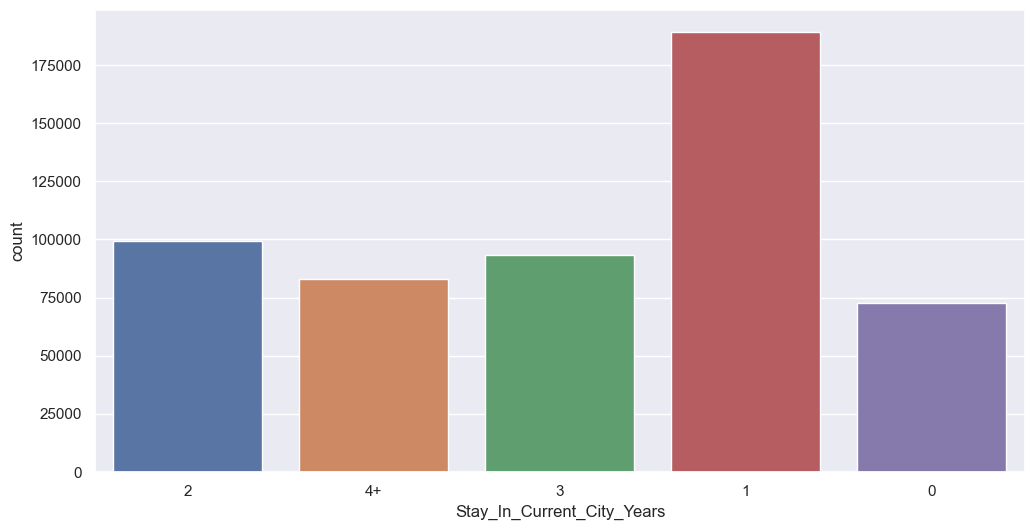

In [120]:
sns.countplot(x="Stay_In_Current_City_Years",data=df)

<AxesSubplot: xlabel='Stay_In_Current_City_Years', ylabel='count'>

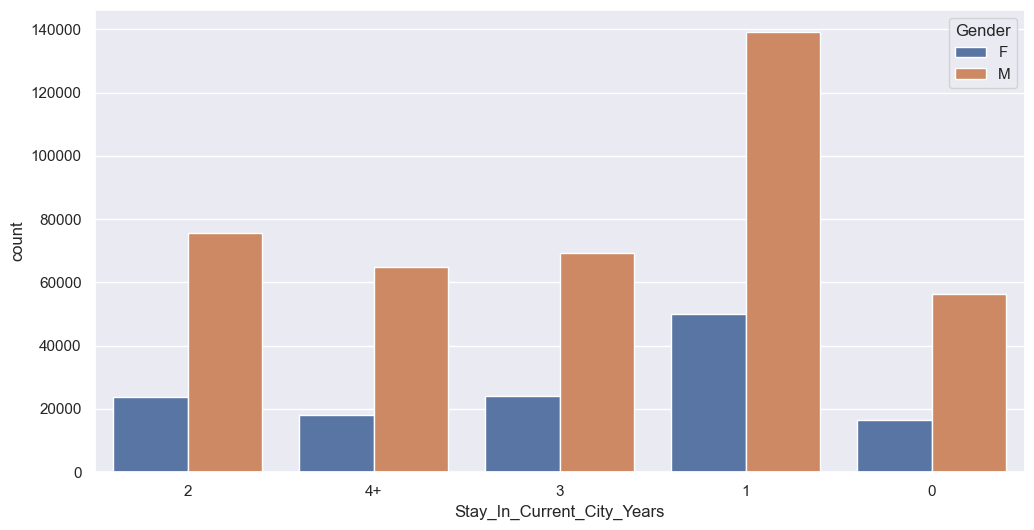

In [121]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Gender",data=df)

<AxesSubplot: xlabel='Stay_In_Current_City_Years', ylabel='count'>

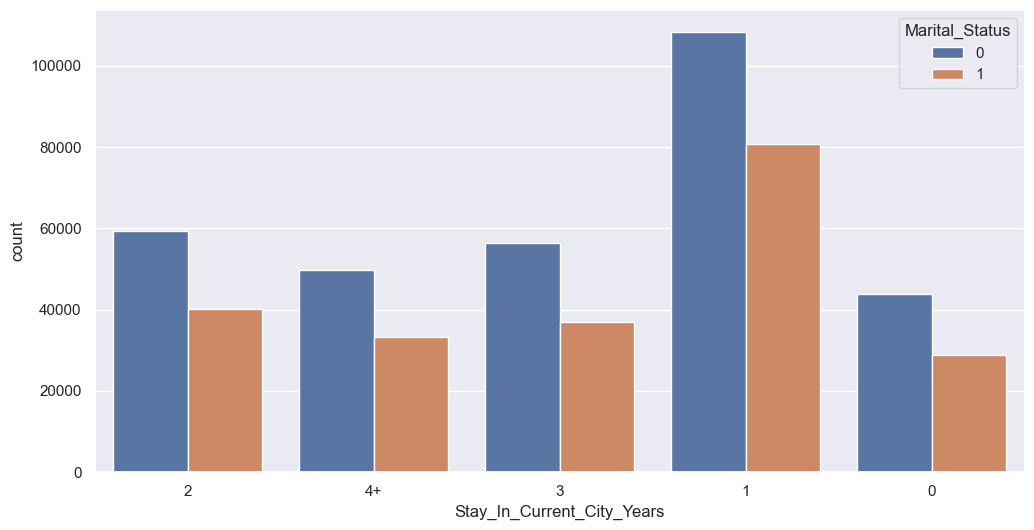

In [122]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Marital_Status",data=df)

<AxesSubplot: xlabel='Stay_In_Current_City_Years', ylabel='count'>

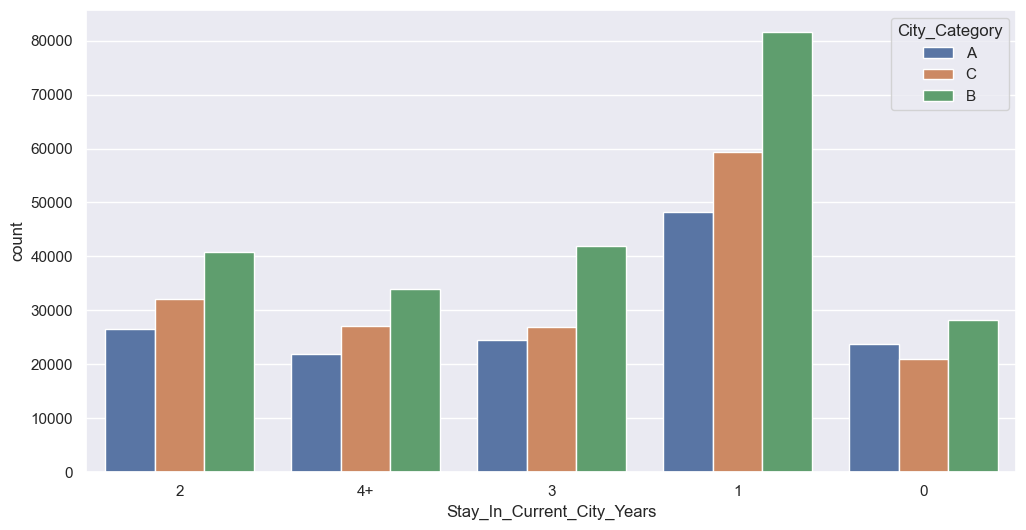

In [123]:
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",data=df)

<AxesSubplot: xlabel='City_Category', ylabel='count'>

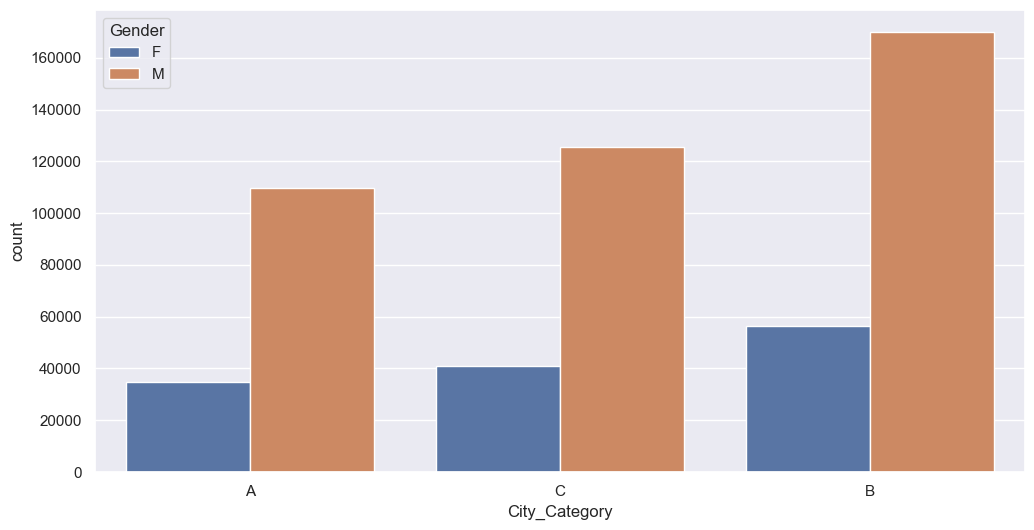

In [124]:
sns.countplot(x="City_Category",hue="Gender",data=df)

<AxesSubplot: >

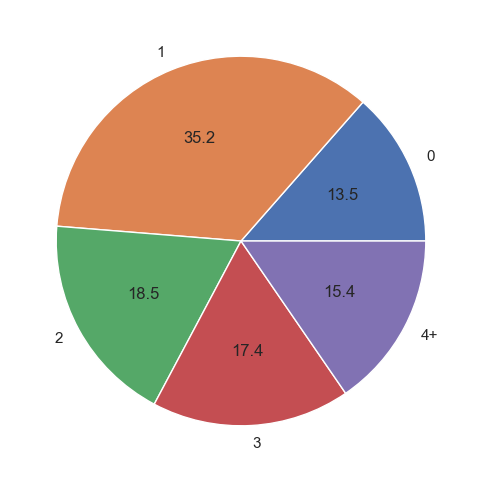

In [125]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%.1f")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\3110609069.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar")


<AxesSubplot: xlabel='Stay_In_Current_City_Years'>

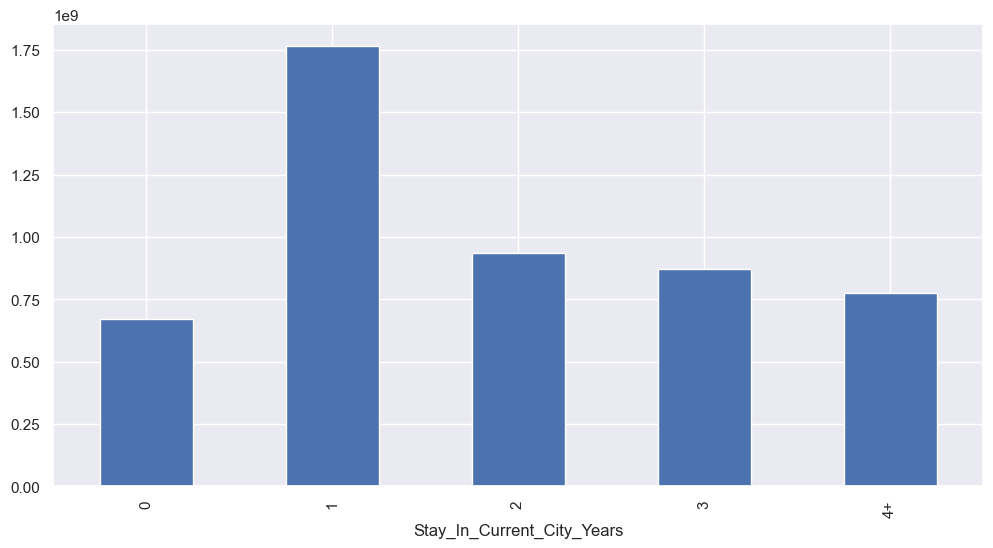

In [126]:
df.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\3018789677.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="bar")


<AxesSubplot: xlabel='Stay_In_Current_City_Years'>

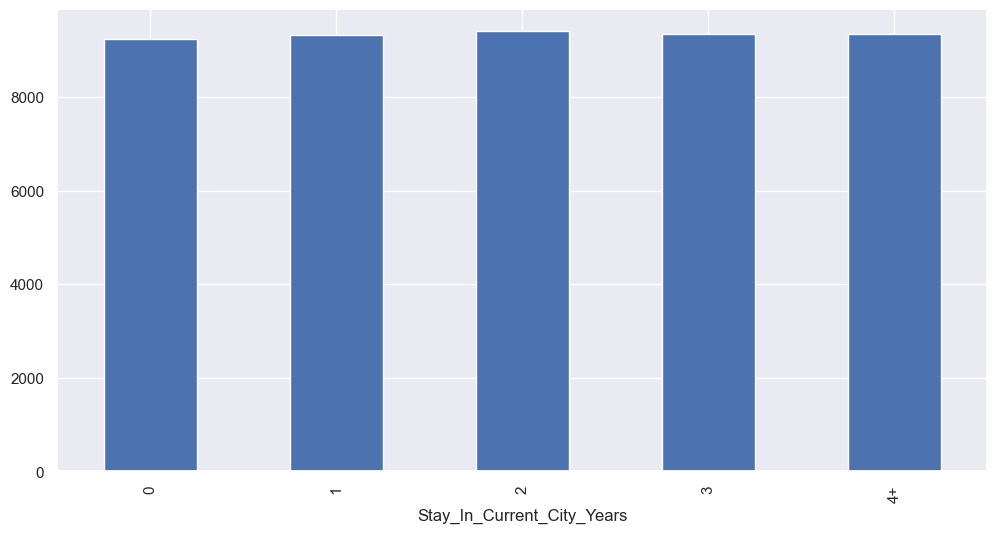

In [127]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="bar")

<AxesSubplot: xlabel='Occupation', ylabel='count'>

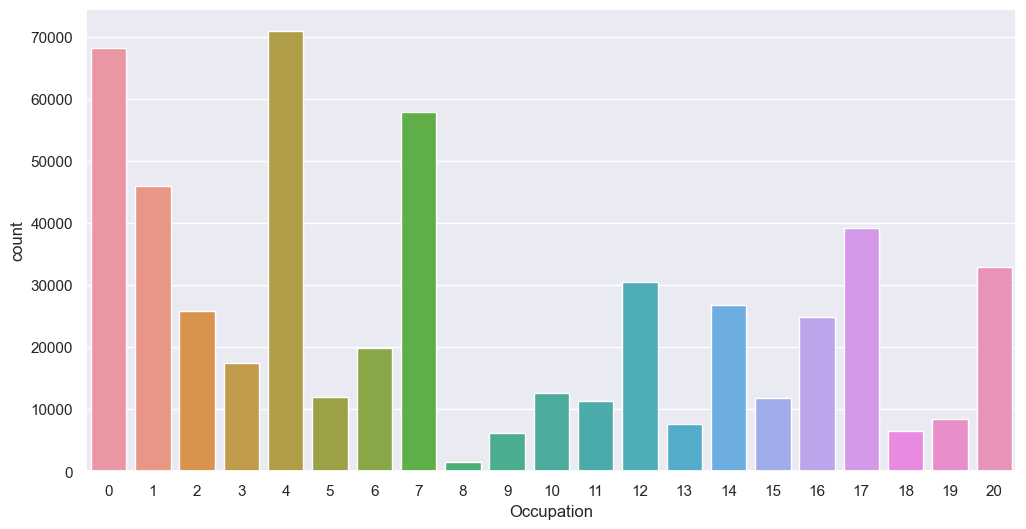

In [128]:
sns.countplot(x="Occupation",data=df)

<AxesSubplot: xlabel='Occupation'>

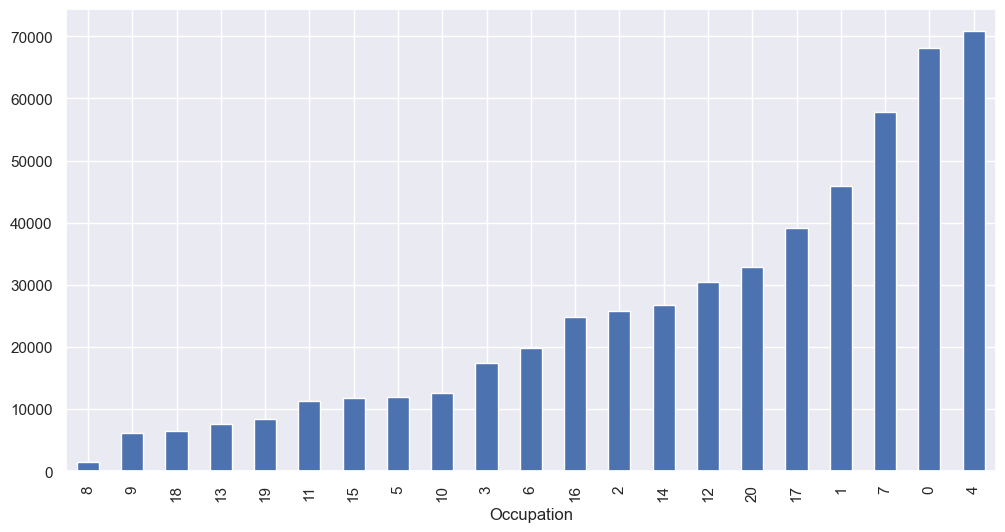

In [129]:
df.groupby("Occupation").size().sort_values().plot(kind="bar")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\2629095294.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Occupation").sum()["Purchase"].sort_values().plot(kind="bar")


<AxesSubplot: xlabel='Occupation'>

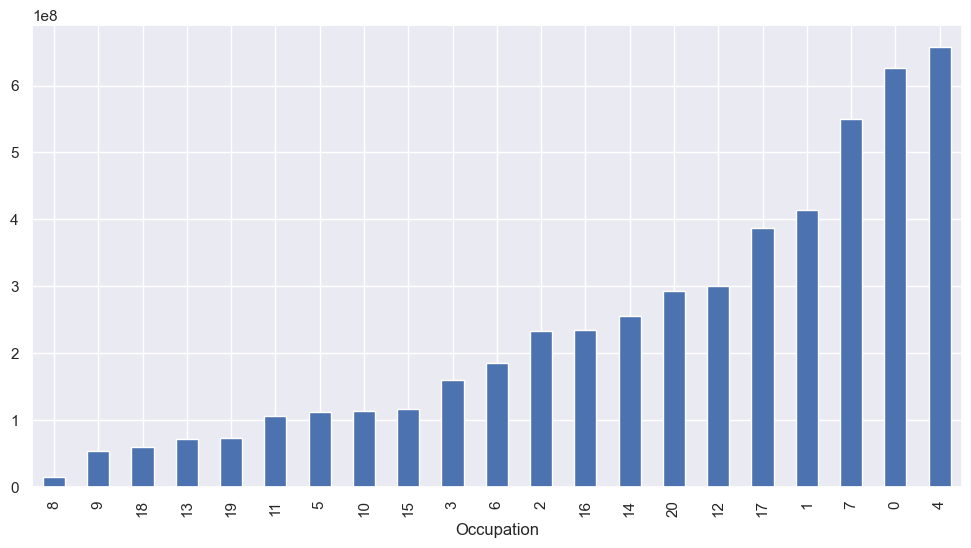

In [130]:
df.groupby("Occupation").sum()["Purchase"].sort_values().plot(kind="bar")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\1984894186.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Occupation").mean()["Purchase"].sort_values().plot(kind="bar")


<AxesSubplot: xlabel='Occupation'>

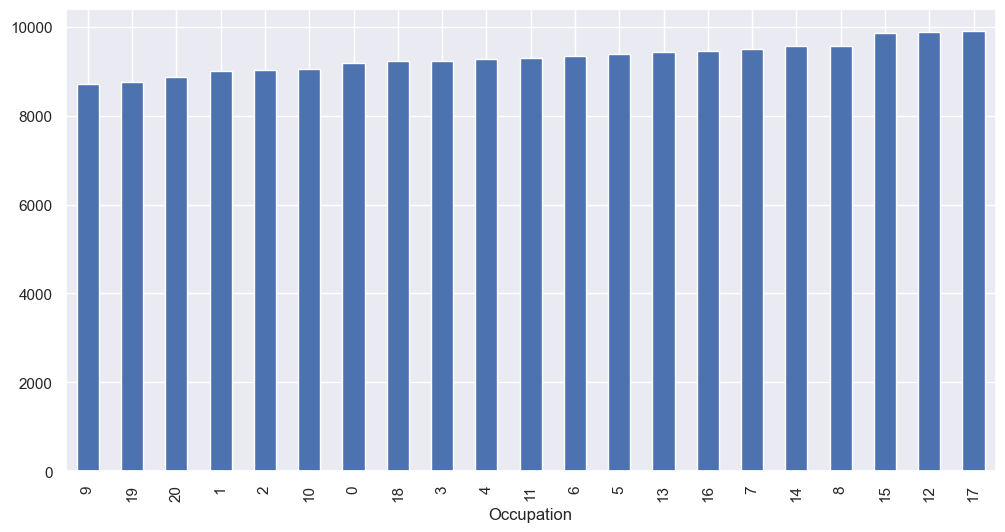

In [131]:
df.groupby("Occupation").mean()["Purchase"].sort_values().plot(kind="bar")

In [132]:
df.groupby("Occupation").mean()["Purchase"].sort_values()

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\1896552456.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Occupation").mean()["Purchase"].sort_values()


Occupation
9     8714.335934
19    8754.249162
20    8881.099514
1     9017.703095
2     9025.938982
10    9052.836410
0     9186.946726
18    9233.671418
3     9238.077277
4     9279.026742
11    9299.467190
6     9336.378620
5     9388.848978
13    9424.449391
16    9457.133118
7     9502.175276
14    9568.536426
8     9576.508530
15    9866.239925
12    9883.052460
17    9906.378997
Name: Purchase, dtype: float64

<AxesSubplot: xlabel='Occupation', ylabel='count'>

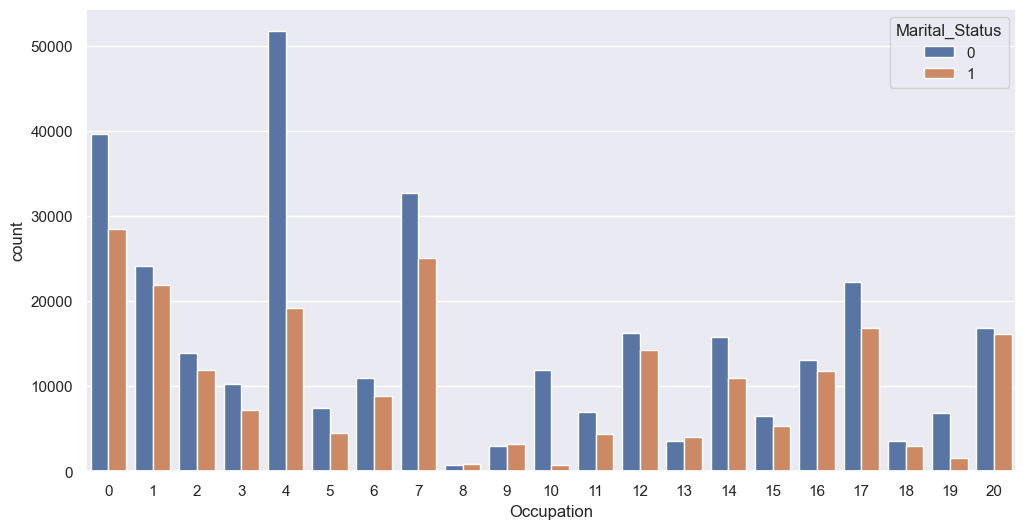

In [133]:
sns.countplot(x = "Occupation",hue="Marital_Status",data = df)

<AxesSubplot: xlabel='Occupation', ylabel='count'>

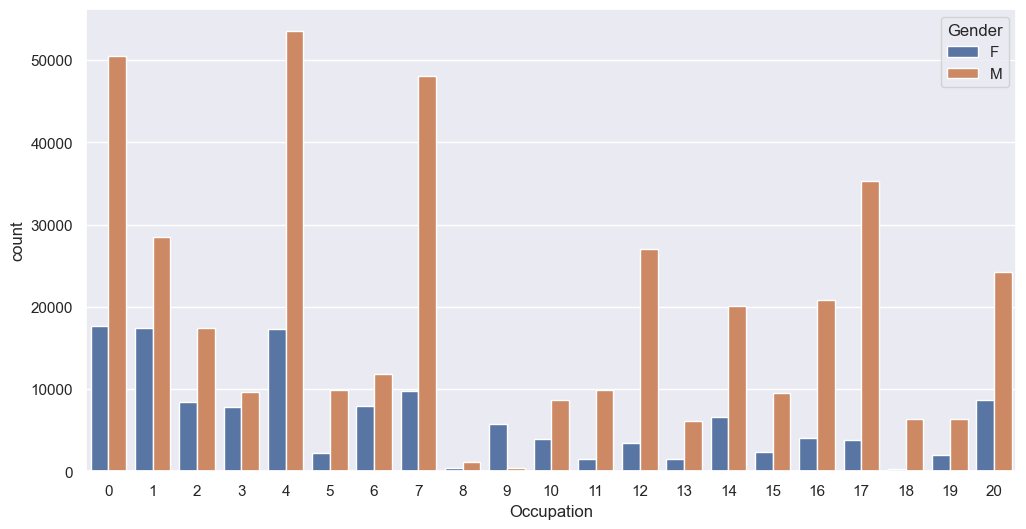

In [134]:
sns.countplot(x = "Occupation",hue="Gender",data = df)

<AxesSubplot: xlabel='Occupation'>

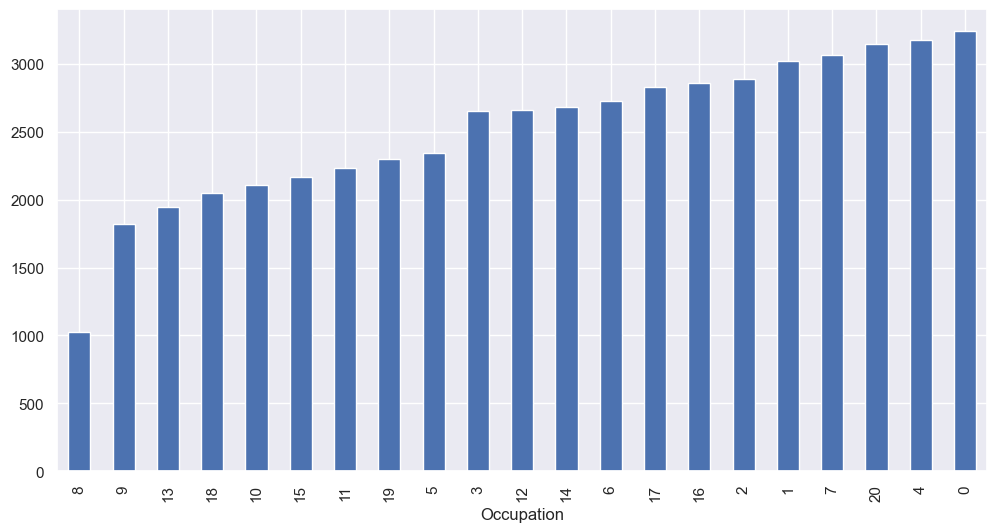

In [135]:
df.groupby("Occupation").nunique()["Product_ID"].sort_values().plot(kind="bar")

<AxesSubplot: xlabel='Product_Category_1'>

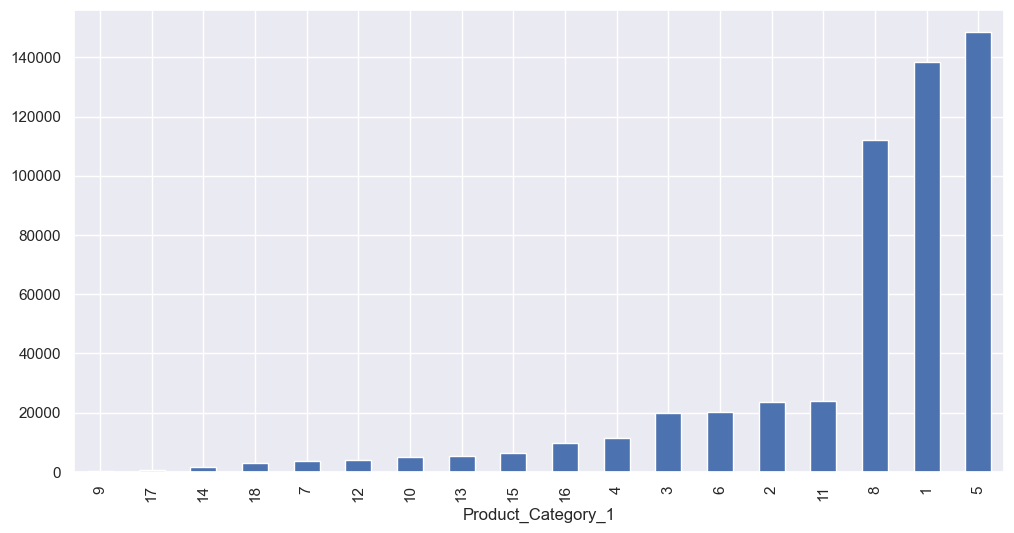

In [136]:
df.groupby("Product_Category_1").size().sort_values().plot(kind="bar")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\1606550662.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Product_Category_1").sum()["Purchase"].sort_values().plot(kind="bar")


<AxesSubplot: xlabel='Product_Category_1'>

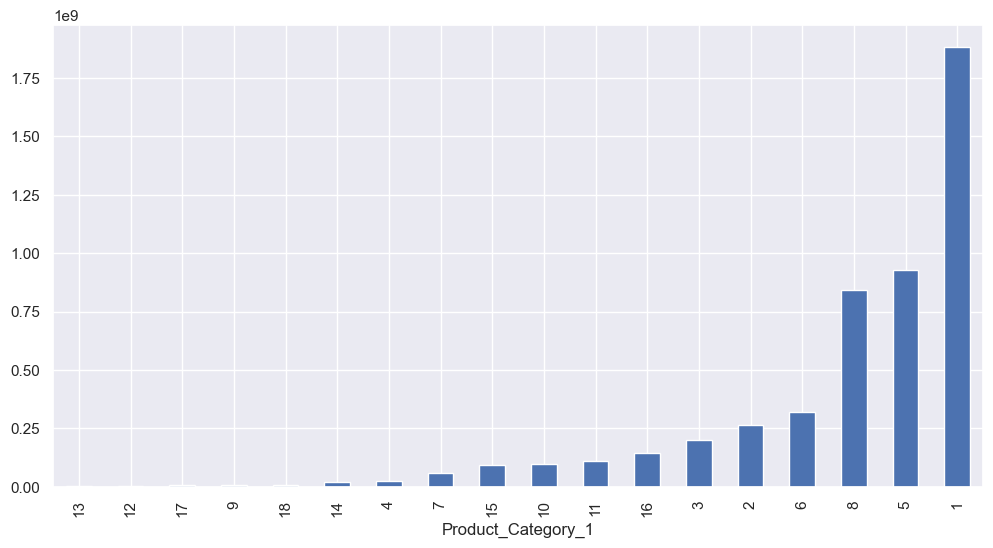

In [137]:
df.groupby("Product_Category_1").sum()["Purchase"].sort_values().plot(kind="bar")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\194978392.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Product_Category_1").mean()["Purchase"].sort_values().plot(kind="bar")


<AxesSubplot: xlabel='Product_Category_1'>

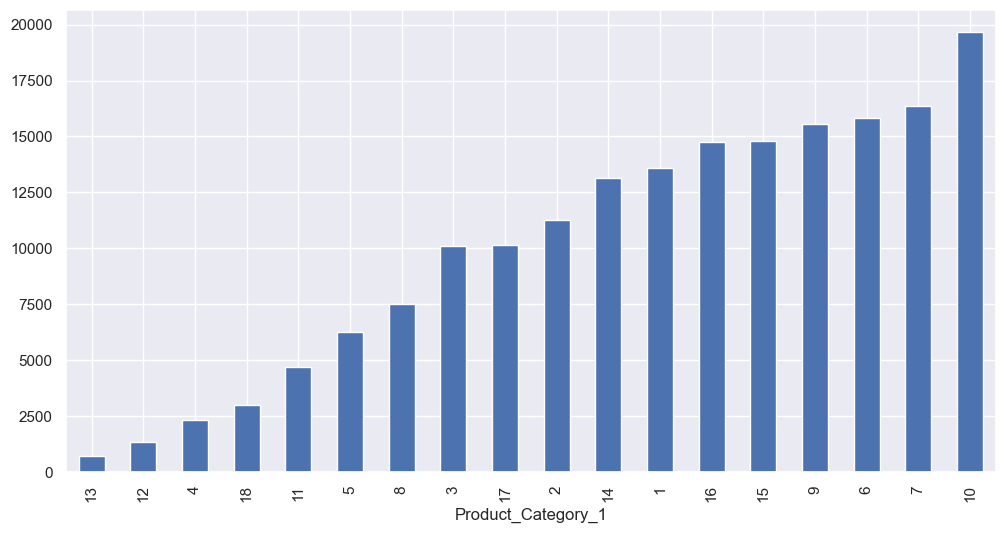

In [138]:
df.groupby("Product_Category_1").mean()["Purchase"].sort_values().plot(kind="bar")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\1719085217.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Product_ID").sum()["Purchase"].nlargest(10).sort_values().plot(kind="bar")


<AxesSubplot: xlabel='Product_ID'>

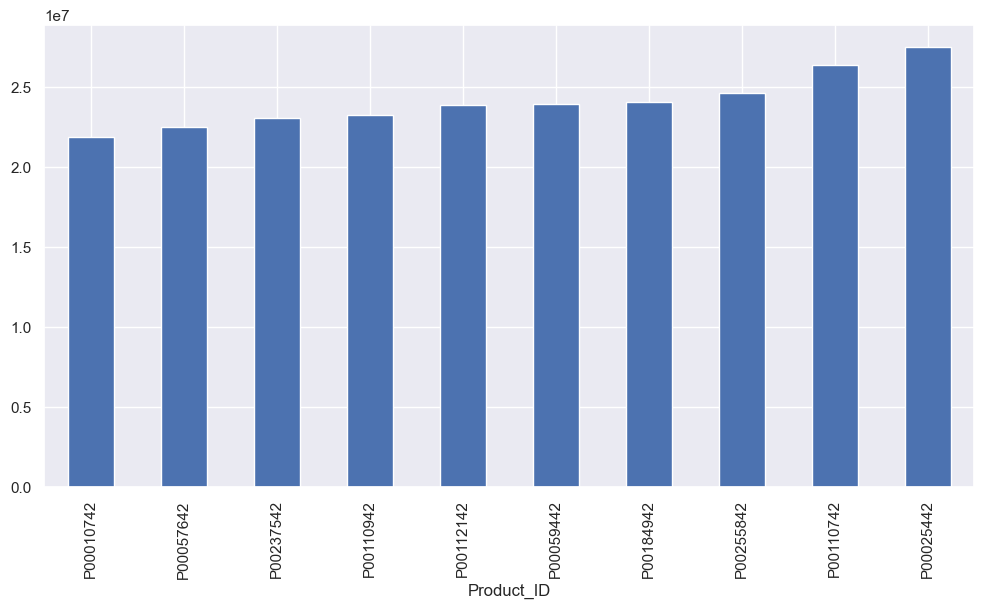

In [139]:
df.groupby("Product_ID").sum()["Purchase"].nlargest(10).sort_values().plot(kind="bar")

<AxesSubplot: xlabel='Product_ID'>

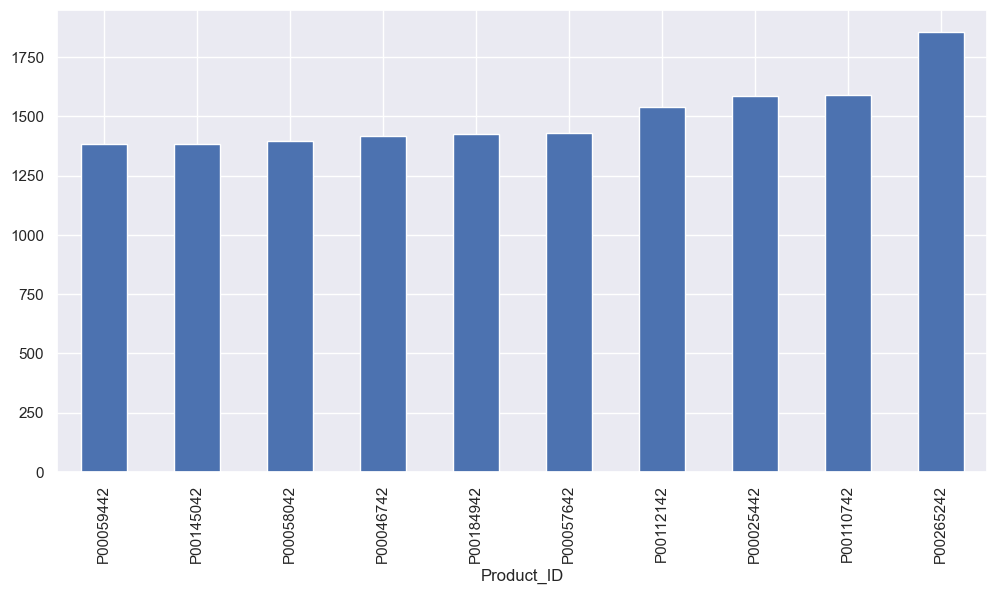

In [72]:
df.groupby("Product_ID").size().nlargest(10).sort_values().plot(kind="bar")

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_12660\1671237289.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Product_ID").mean()["Purchase"].nlargest(10).sort_values().plot(kind="bar")


<AxesSubplot: xlabel='Product_ID'>

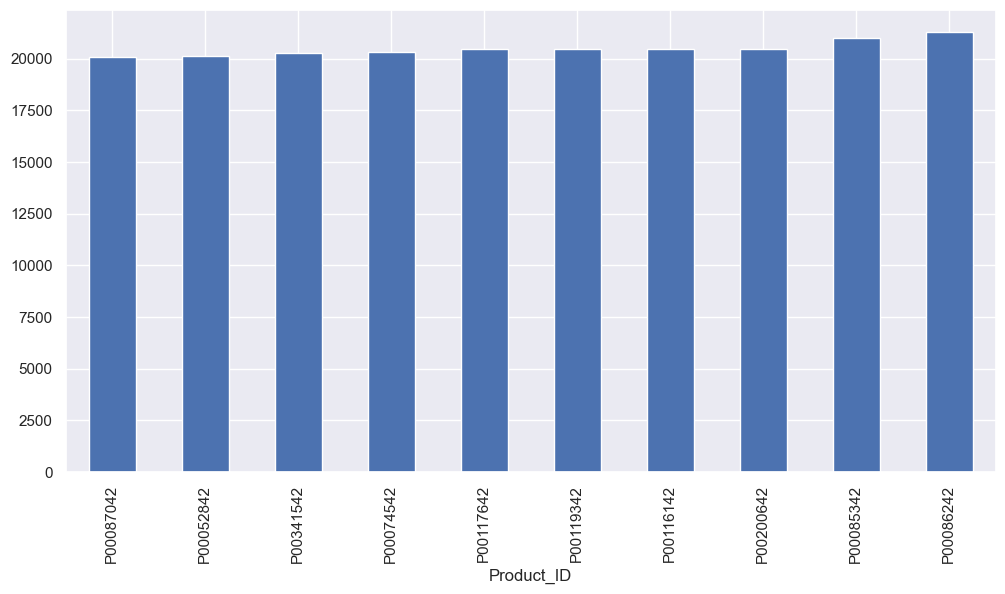

In [140]:
df.groupby("Product_ID").mean()["Purchase"].nlargest(10).sort_values().plot(kind="bar")

<AxesSubplot: xlabel='Product_Category_1', ylabel='count'>

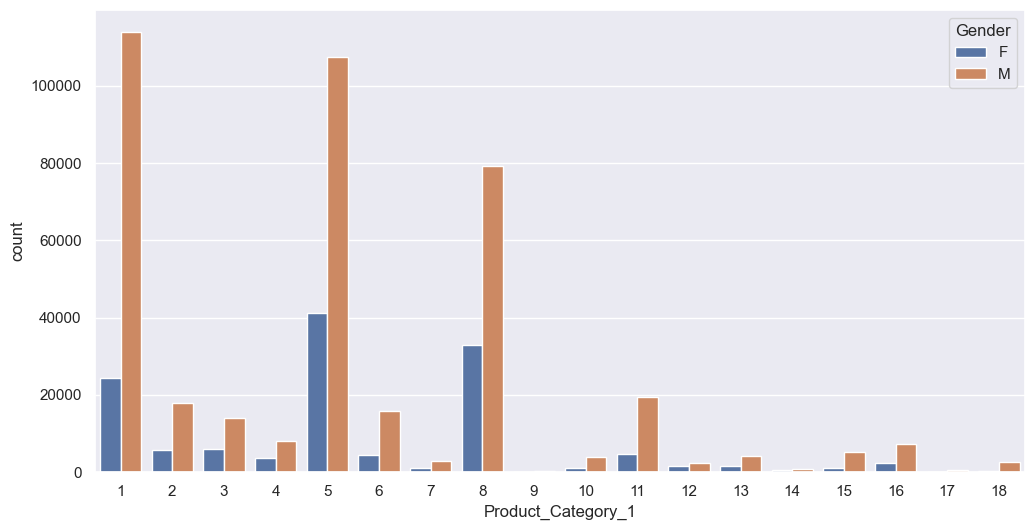

In [141]:
sns.countplot(x="Product_Category_1",hue="Gender",data=df)

<AxesSubplot: xlabel='Product_Category_1', ylabel='count'>

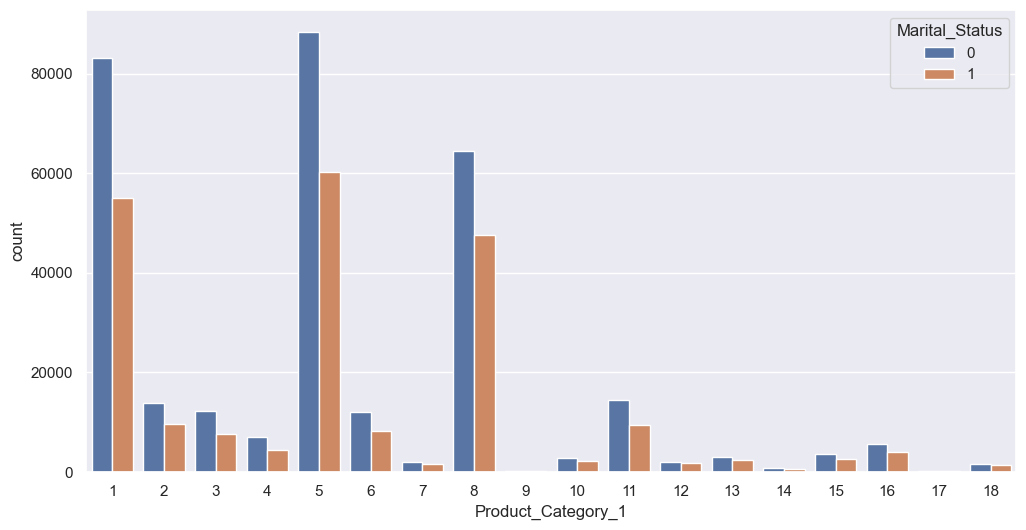

In [142]:
sns.countplot(x="Product_Category_1",hue="Marital_Status",data=df)

In [144]:
l=[]
for i in range(len(df)):
    l.append(str(df["Gender"][i])+"_"+str(df["Marital_Status"][i]))
df["MaritalGender"] = l

In [145]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot: xlabel='MaritalGender', ylabel='count'>

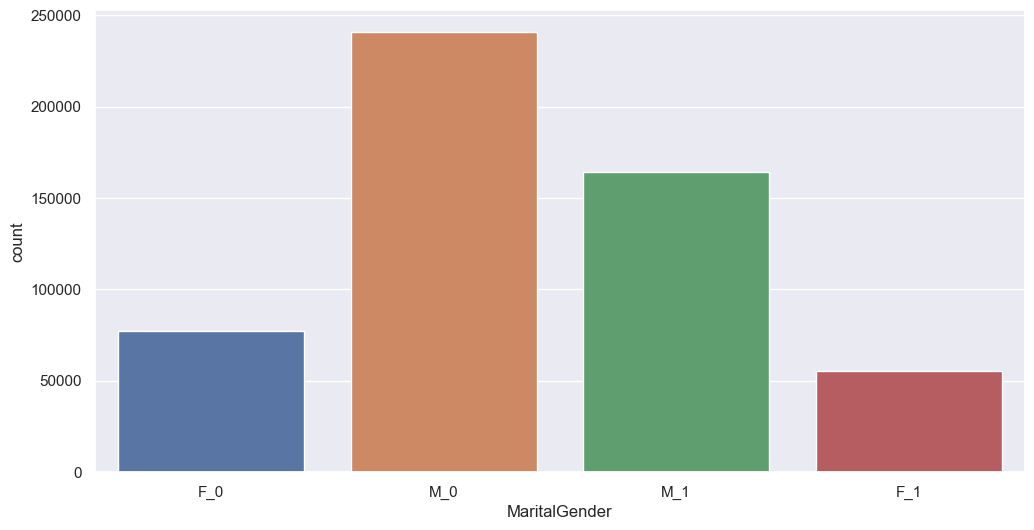

In [146]:
sns.countplot(x = "MaritalGender",data=df)

<AxesSubplot: xlabel='Age', ylabel='count'>

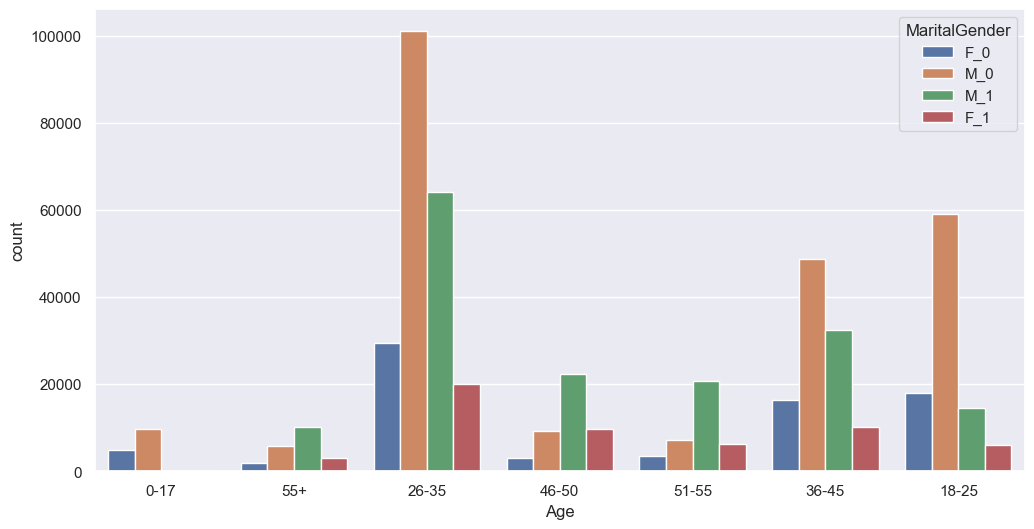

In [147]:
sns.countplot(x="Age",hue = "MaritalGender",data=df)

<AxesSubplot: xlabel='Product_Category_1', ylabel='count'>

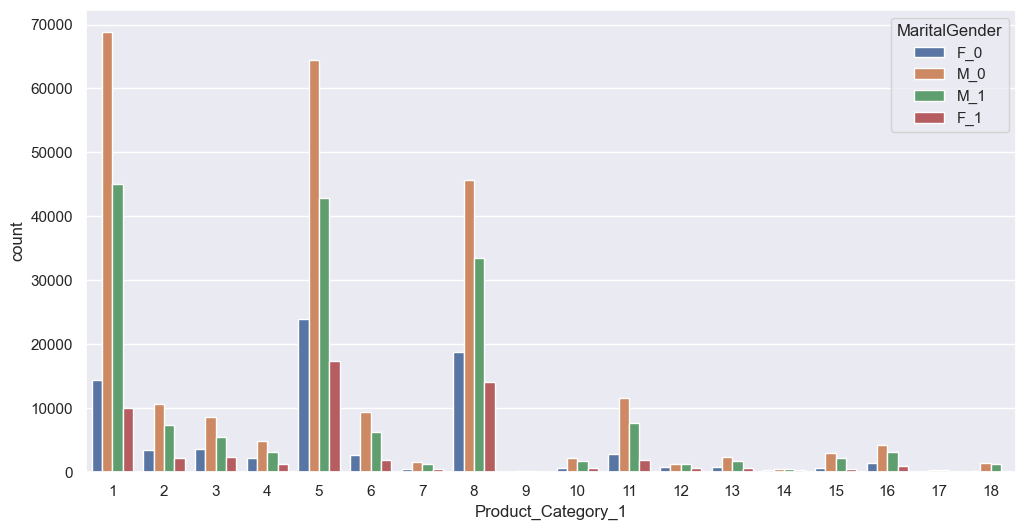

In [148]:
sns.countplot(x="Product_Category_1",hue = "MaritalGender",data=df)

<AxesSubplot: xlabel='Stay_In_Current_City_Years', ylabel='count'>

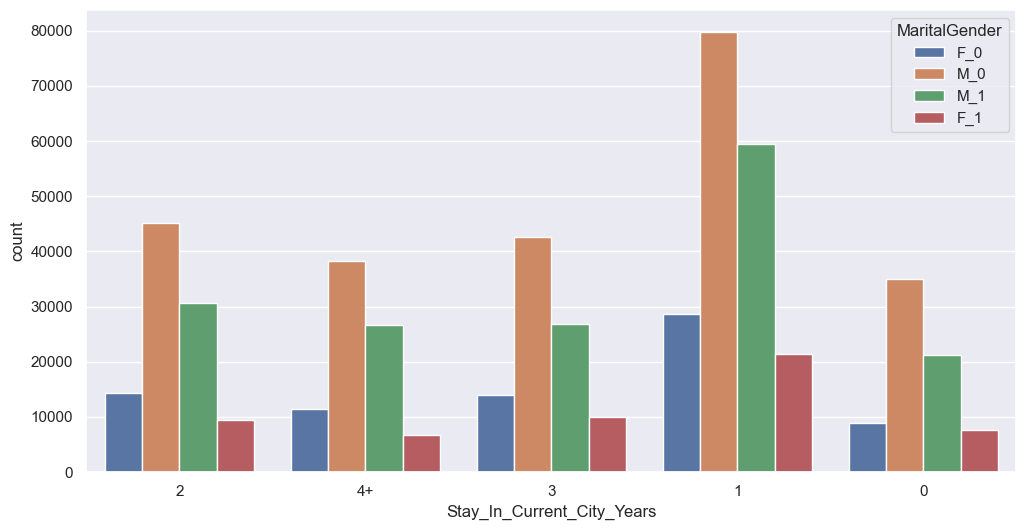

In [149]:
sns.countplot(x="Stay_In_Current_City_Years",hue = "MaritalGender",data=df)

<AxesSubplot: xlabel='City_Category', ylabel='count'>

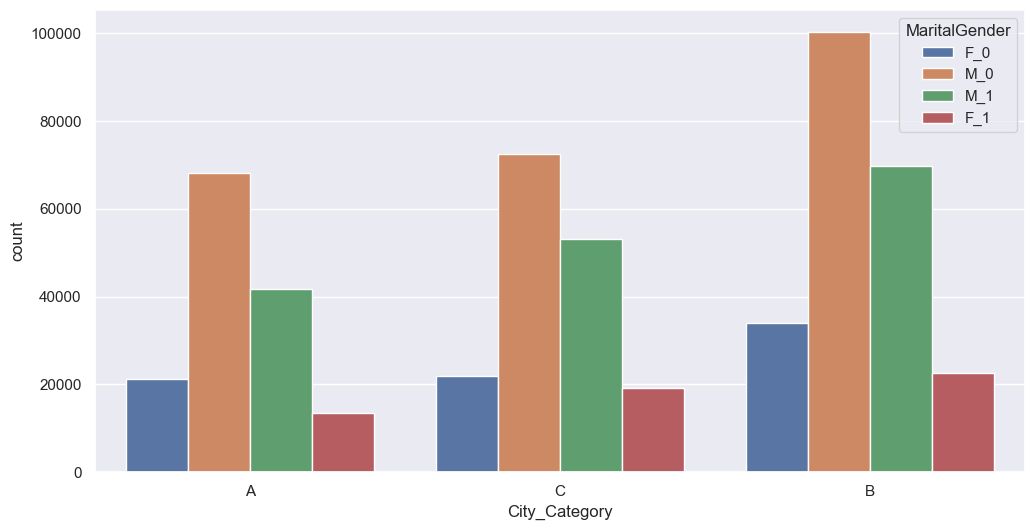

In [150]:
sns.countplot(x="City_Category",hue = "MaritalGender",data=df)